In [1]:
#Import Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r'E:\Installations\Scripts\Digit Recognization\train.csv')

In [3]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
df.shape

(42000, 785)

In [5]:
plt.imshow(df.iloc[0,1:].values.reshape(28,28))

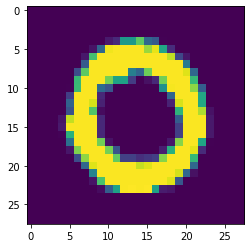

In [6]:
plt.imshow(df.iloc[1,1:].values.reshape(28,28))

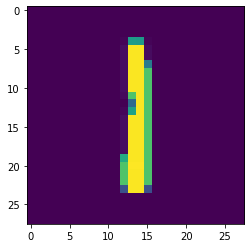

In [7]:
plt.imshow(df.iloc[2,1:].values.reshape(28,28))

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.9648809523809524


<AxesSubplot:>

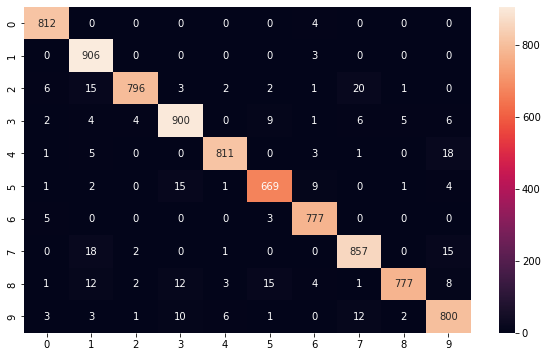

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test , y_pred), annot= True,fmt='.3g' )

# Dimetionality Reduction without using PCA

## find the co-variance matrix 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
covar_matrix = np.matmul(X_train_scaled.T,X_train_scaled)

eig_val , eig_vect = np.linalg.eig(covar_matrix)

#Top 2 eigen vectors
pc = eig_vect[0:2]

In [52]:
covar_matrix.shape

(784, 784)

In [53]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix , eigvals = (782,783) )

print("Shape of eigen vectors = ", vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [55]:
# multiplication of two principal eigen vectors with transposed sample_data to get 2d projected data
new_coordinates = np.matmul(vectors, X_train_scaled.T)

##print (" resultanat new data points' shape ", vectors.shape  , "X",     ," = ",    )

In [58]:
# appending label to the 2d projected data (Hint: use np.vstack)
new_coordinates = np.vstack((new_coordinates, y_train)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data = new_coordinates, columns = ('1st_principal', '2nd_principal' , 'label'))

#print dataframe head

dataframe.head()

1st_principal  2nd_principal  label
0      -0.489824      -2.718633    6.0
1      -6.753625      -0.676980    5.0
2       6.509816      -3.033233    3.0
3       5.414383      -0.203482    4.0
4       5.609416      -7.574496    7.0

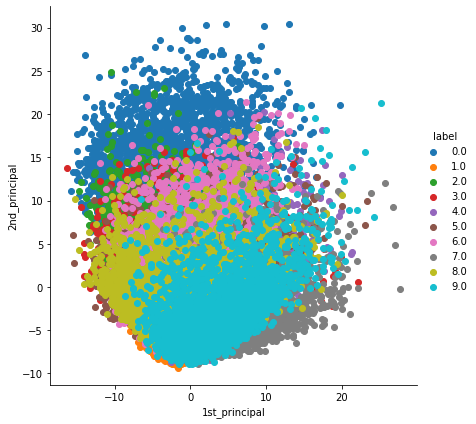

In [59]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.FacetGrid(dataframe, hue = 'label', size = 6).map(plt.scatter, '1st_principal' , '2nd_principal').add_legend()


# Using PCA from SKLEARN

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca.shape)
print(X_test_pca.shape)

(33600, 784)
(8400, 784)


## PCA with 100 dimentions

In [17]:
pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('X_train_pca shape: ',X_train_pca.shape)
print('X_test_pca shape: ',X_test_pca.shape)

knn= KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

y_pred_pca = knn.predict(X_test_pca) 

print('Accuracy: ', accuracy_score(y_test, y_pred_pca))

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test , y_pred_pca), annot= True,fmt='.3g' )

X_train_pca shape:  (33600, 100)
X_test_pca shape:  (8400, 100)
Accuracy:  0.9523809523809523


<AxesSubplot:>

## PCA with 200 dimentions

In [18]:
pca = PCA(n_components=200)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('X_train_pca shape: ',X_train_pca.shape)
print('X_test_pca shape: ',X_test_pca.shape)

knn= KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

y_pred_pca = knn.predict(X_test_pca) 

print('Accuracy: ', accuracy_score(y_test, y_pred_pca))

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test , y_pred_pca), annot= True,fmt='.3g' )

X_train_pca shape:  (33600, 200)
X_test_pca shape:  (8400, 200)
Accuracy:  0.9510714285714286


<AxesSubplot:>

In [20]:
for i in range(1,10):
    
    pca = PCA(n_components=i)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    knn= KNeighborsClassifier()
    knn.fit(X_train_pca,y_train)
    
    y_pred_pca = knn.predict(X_test_pca) 
    print(accuracy_score(y_test , y_pred_pca))
    

0.25785714285714284
0.3236904761904762
0.5101190476190476
0.6664285714285715
0.738452380952381
0.8222619047619047
0.8432142857142857
0.8726190476190476
0.8866666666666667


# Data Visualization

In [21]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
X_train_pca.shape

(33600, 2)

In [28]:
import plotly.express as px
y_train_pca = y_train.astype('str')
fig = px.scatter(x =X_train_pca[:,0] , y=X_train_pca[:,1],color=y_train_pca, 
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [30]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca.shape)

import plotly.express as px
y_train_pca = y_train.astype('str')
fig = px.scatter_3d(x =X_train_pca[:,0] , y=X_train_pca[:,1], z= X_train_pca[:,2], color=y_train_pca, 
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

(33600, 3)


In [31]:
##Eigen Values

pca.explained_variance_

array([40.67111198, 29.17023395, 26.74459598])

In [34]:
pca.explained_variance_ratio_

##It gives the percentage of variance explained by each of the principal components

array([0.05785192, 0.0414927 , 0.03804239])

In [32]:
##Eigen Vectors
pca.components_

array([[-5.29539904e-19,  2.17918781e-19, -2.43071934e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.80566703e-17,  1.92531210e-18, -1.57480907e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.72390985e-17, -2.10941251e-17,  1.92996618e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [33]:
pca.components_.shape

(3, 784)

# Find Out the Optimal number of Principal Components

In [35]:
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [36]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(pca.components_.shape)

(33600, 784)
(8400, 784)
(784, 784)


In [38]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

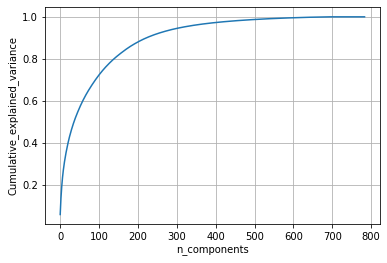

In [43]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axis('tight')
plt.grid()

plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

From above you can see that if we take 200-dimensions, approx. 90% of variance is expalined.

Our intention with the princpal component analysis is to reduce the high-dimensional input to a low-dimensional input. Ultimately that low-dimensional input is intended for use in a model, since adding more components increases the cost and the accuracy.

PCA is a method that brings together:
1. A measure of how each variable is associated with one another. (Covariance matrix.)

2. The directions in which our data are dispersed. (Eigenvectors.)

3. The relative importance of these different directions. (Eigenvalues.)

4. PCA combines our predictors and allows us to drop the Eigenvectors that are relatively unimportant.

